In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, TensorBoard
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.preprocessing.image import img_to_array
from tqdm import tqdm
import math

Using TensorFlow backend.


In [2]:
height = 64
width = 256
channel = 3

In [5]:
clean_data_path = 'D:\\intern\\classified_data\\clean_data\\extra_clean\\extra_clean'
noisy_15dB_path = 'D:\\intern\\classified_data\\noisy_data\\15dB\\extra_15dB\\extra_15dB'
noisy_20dB_path = 'D:\\intern\\classified_data\\noisy_data\\20dB\\extra_20dB\\extra_20dB'
noisy_25dB_path = 'D:\\intern\\classified_data\\noisy_data\\25dB\\extra_25dB\\extra_25dB'
noisy_30dB_path = 'D:\\intern\\classified_data\\noisy_data\\30dB\\extra_30dB\\extra_30dB'
noisy_100dB_path = 'D:\\intern\\classified_data\\noisy_data\\100dB\\extra_100dB\\extra_100dB'

In [6]:
clean_data_files = os.listdir(clean_data_path)
noisy_15dB_files = os.listdir(noisy_15dB_path)
noisy_20dB_files = os.listdir(noisy_20dB_path)
noisy_25dB_files = os.listdir(noisy_25dB_path)
noisy_30dB_files = os.listdir(noisy_30dB_path)
noisy_100dB_files = os.listdir(noisy_100dB_path)

In [7]:
clean_data = np.zeros((len(clean_data_files), height, width, channel), dtype=np.float32)
noisy_15dB = np.zeros((len(noisy_15dB_files), height, width, channel), dtype=np.float32)
noisy_20dB = np.zeros((len(noisy_20dB_files), height, width, channel), dtype=np.float32)
noisy_25dB = np.zeros((len(noisy_25dB_files), height, width, channel), dtype=np.float32)
noisy_30dB = np.zeros((len(noisy_30dB_files), height, width, channel), dtype=np.float32)
noisy_100dB = np.zeros((len(noisy_100dB_files), height, width, channel), dtype=np.float32)

In [8]:
n=0
for i in tqdm(clean_data_files):
    img = cv2.imread(clean_data_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    clean_data[n] = img
    n = n+1

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 268.71it/s]


In [9]:
n=0
for i in tqdm(noisy_15dB_files):
    img = cv2.imread(noisy_15dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_15dB[n] = img
    n = n+1

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:19<00:00, 25.76it/s]


In [10]:
n=0
for i in tqdm(noisy_20dB_files):
    img = cv2.imread(noisy_20dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_20dB[n] = img
    n = n+1

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 91.28it/s]


In [11]:
n=0
for i in tqdm(noisy_25dB_files):
    img = cv2.imread(noisy_25dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_25dB[n] = img
    n = n+1

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:09<00:00, 51.50it/s]


In [12]:
n=0
for i in tqdm(noisy_30dB_files):
    img = cv2.imread(noisy_30dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_30dB[n] = img
    n = n+1

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:11<00:00, 42.79it/s]


In [13]:
n=0
for i in tqdm(noisy_100dB_files):
    img = cv2.imread(noisy_100dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_100dB[n] = img
    n = n+1

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:09<00:00, 53.66it/s]


In [14]:
print(clean_data.shape)
print(noisy_15dB.shape)
print(noisy_20dB.shape)
print(noisy_25dB.shape)
print(noisy_30dB.shape)
print(noisy_100dB.shape)

(500, 64, 256, 3)
(500, 64, 256, 3)
(500, 64, 256, 3)
(500, 64, 256, 3)
(500, 64, 256, 3)
(500, 64, 256, 3)


In [19]:
model = Sequential([    
    # encoder
    Conv2D(128, (3,3), padding="same", activation="relu", input_shape=(height,width,channel)),
    BatchNormalization(),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    
    
    # decoder
    Conv2D(8, (3,3), padding="same", activation="relu"),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    
    Conv2D(channel, (3,3), padding="same", activation="sigmoid") # sigmoid, relu 
    
])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 64, 256, 128)      3584      
_________________________________________________________________
batch_normalization_10 (Batc (None, 64, 256, 128)      512       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 256, 128)      147584    
_________________________________________________________________
batch_normalization_11 (Batc (None, 64, 256, 128)      512       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 128, 128)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 128, 64)       73792     
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 128, 64)      

In [21]:
model.compile(optimizer=Adam(lr=0.0001), loss='mse', metrics=['accuracy'])

In [23]:
history = model.fit(noisy_100dB, clean_data,
          validation_split=0.2,
          batch_size=16,
          epochs=100,
          #callbacks=callbacks_list
        )

Train on 400 samples, validate on 100 samples
Epoch 1/100
400/400 [==============================] - 284s 711ms/sample - loss: 0.0362 - accuracy: 0.8854 - val_loss: 0.0404 - val_accuracy: 0.9837
Epoch 2/100
400/400 [==============================] - 282s 704ms/sample - loss: 0.0260 - accuracy: 0.5187 - val_loss: 0.0354 - val_accuracy: 0.9763
Epoch 3/100
400/400 [==============================] - 292s 729ms/sample - loss: 0.0208 - accuracy: 0.4486 - val_loss: 0.0327 - val_accuracy: 0.2424
Epoch 4/100
400/400 [==============================] - 289s 721ms/sample - loss: 0.0180 - accuracy: 0.3798 - val_loss: 0.0306 - val_accuracy: 0.0678
Epoch 5/100
400/400 [==============================] - 283s 708ms/sample - loss: 0.0162 - accuracy: 0.3944 - val_loss: 0.0296 - val_accuracy: 0.1322
Epoch 6/100
400/400 [==============================] - 278s 694ms/sample - loss: 0.0150 - accuracy: 0.3471 - val_loss: 0.0296 - val_accuracy: 0.1801
Epoch 7/100
400/400 [==============================] - 284s 

400/400 [==============================] - 269s 673ms/sample - loss: 0.0087 - accuracy: 0.3467 - val_loss: 0.0085 - val_accuracy: 0.3520
Epoch 56/100
400/400 [==============================] - 264s 661ms/sample - loss: 0.0088 - accuracy: 0.3466 - val_loss: 0.0092 - val_accuracy: 0.3295
Epoch 57/100
400/400 [==============================] - 263s 657ms/sample - loss: 0.0088 - accuracy: 0.3518 - val_loss: 0.0096 - val_accuracy: 0.3613
Epoch 58/100
400/400 [==============================] - 260s 649ms/sample - loss: 0.0090 - accuracy: 0.3245 - val_loss: 0.0083 - val_accuracy: 0.3746
Epoch 59/100
400/400 [==============================] - 259s 649ms/sample - loss: 0.0089 - accuracy: 0.3450 - val_loss: 0.0079 - val_accuracy: 0.3494
Epoch 60/100
400/400 [==============================] - 259s 647ms/sample - loss: 0.0086 - accuracy: 0.3567 - val_loss: 0.0087 - val_accuracy: 0.3425
Epoch 61/100
400/400 [==============================] - 258s 646ms/sample - loss: 0.0087 - accuracy: 0.3358 - val

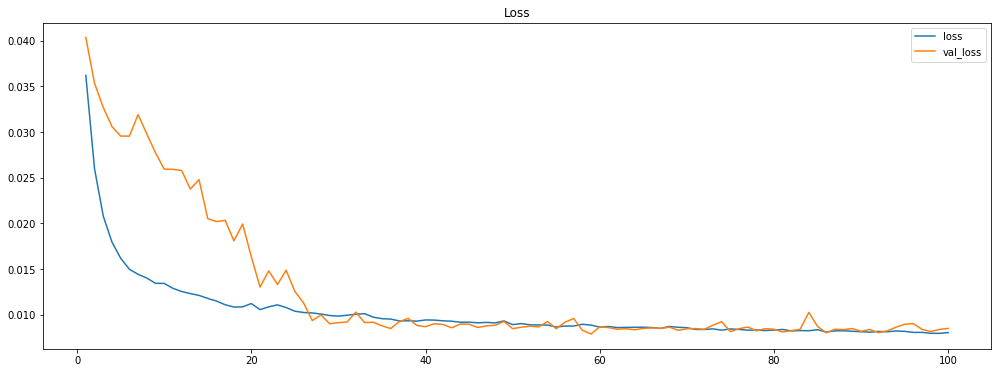

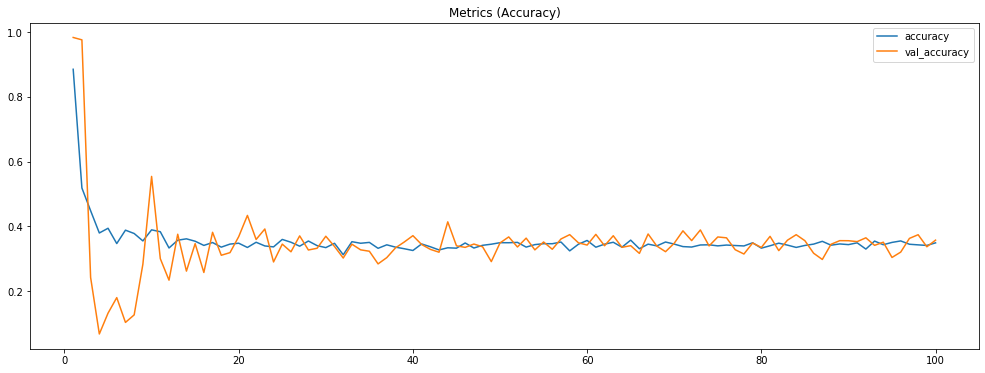

In [24]:
plt.rcParams['figure.figsize'] = (17,6)
fig, ax1 = plt.subplots()
xepochs = range(1,len(history.history['loss']) + 1)

plt.plot(xepochs, history.history['loss'], label = 'loss')
plt.plot(xepochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(xepochs, history.history['accuracy'], label = 'accuracy')
plt.plot(xepochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Metrics (Accuracy)')
plt.legend()
plt.show()

In [25]:
predicted_15dB = model.predict(noisy_15dB)
predicted_20dB = model.predict(noisy_20dB)
predicted_25dB = model.predict(noisy_25dB)
predicted_30dB = model.predict(noisy_30dB)
predicted_100dB = model.predict(noisy_100dB)
predicted_clean = model.predict(clean_data)

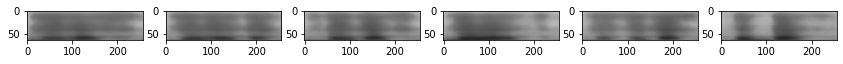

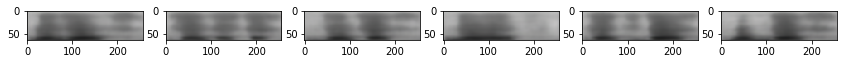

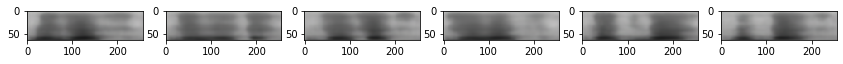

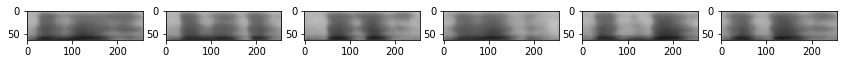

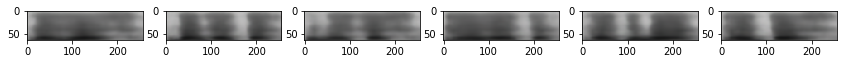

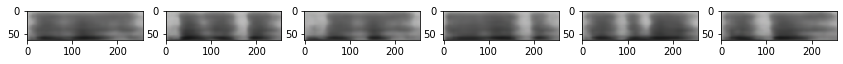

In [26]:
# Displaying predicted_15dB images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    plt.imshow(predicted_15dB[i])
plt.show()

# Displaying predicted_20dB images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    plt.imshow(predicted_20dB[i])
plt.show()

# Displaying predicted_25dB images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    plt.imshow(predicted_25dB[i])
plt.show()

# Displaying predicted_30dB images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    plt.imshow(predicted_30dB[i])
plt.show()

# Displaying predicted_100dB images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    plt.imshow(predicted_100dB[i])
plt.show()

# Displaying predicted_clean images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    plt.imshow(predicted_clean[i])
plt.show()

In [27]:
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse)) 
    return psnr

In [37]:
psnr_15dB = []
psnr_20dB = []
psnr_25dB = []
psnr_30dB = []
psnr_100dB = []
psnr_clean = []

In [38]:
# PSNR on 15dB
n=0
for i in range(len(predicted_15dB)):
    n = n + 1
    psnr = PSNR(noisy_15dB[i], predicted_15dB[i])
    psnr_15dB.append(psnr)
    

print(f'{n} PSNR for (noisy_15dB, predicted_15dB) calculated.')
print(f'avg PSNR for 15dB :{PSNR(noisy_15dB, predicted_15dB)}')

500 PSNR for (noisy_15dB, predicted_15dB) calculated.
avg PSNR for 15dB :67.37581656429165


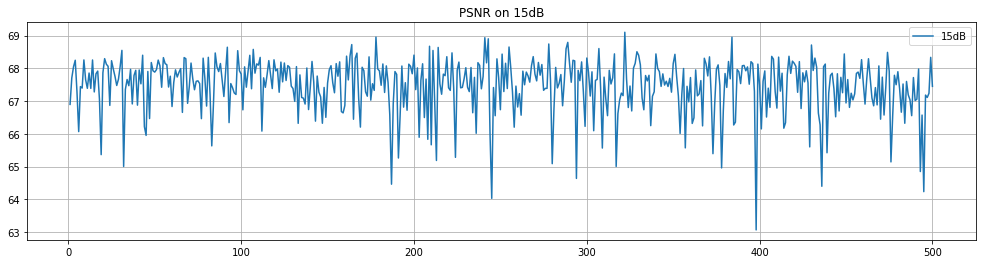

In [39]:
# Displaying psnr on 15dB data

xepochs = range(1,len(predicted_15dB) + 1)

plt.figure(figsize=(17,4))
plt.plot(xepochs, psnr_15dB, label = '15dB')
plt.title('PSNR on 15dB')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# PSNR on 20dB
n=0
for i in range(len(predicted_20dB)):
    n = n + 1
    psnr = PSNR(noisy_20dB[i], predicted_20dB[i])
    psnr_20dB.append(psnr)
    

print(f'{n} PSNR for (noisy_20dB, predicted_20dB) calculated.')
print(f'avg PSNR for 20dB :{PSNR(noisy_20dB, predicted_20dB)}')

500 PSNR for (noisy_20dB, predicted_20dB) calculated.
avg PSNR for 20dB :67.79199560860536


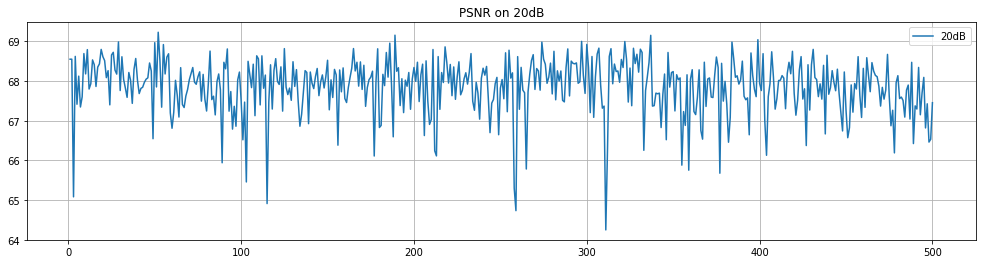

In [41]:
# Displaying psnr on 20dB data

xepochs = range(1,len(predicted_20dB) + 1)

plt.figure(figsize=(17,4))
plt.plot(xepochs, psnr_20dB, label = '20dB')
plt.title('PSNR on 20dB')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
# PSNR on 25dB
n=0
for i in range(len(predicted_25dB)):
    n = n+1
    psnr = PSNR(noisy_25dB[i], predicted_25dB[i])
    psnr_25dB.append(psnr) 

print(f'{n} PSNR for (noisy_25dB, predicted_25dB) calculated.')
print(f'avg PSNR for 25dB :{PSNR(noisy_25dB, predicted_25dB)}')

500 PSNR for (noisy_25dB, predicted_25dB) calculated.
avg PSNR for 25dB :68.14816781519427


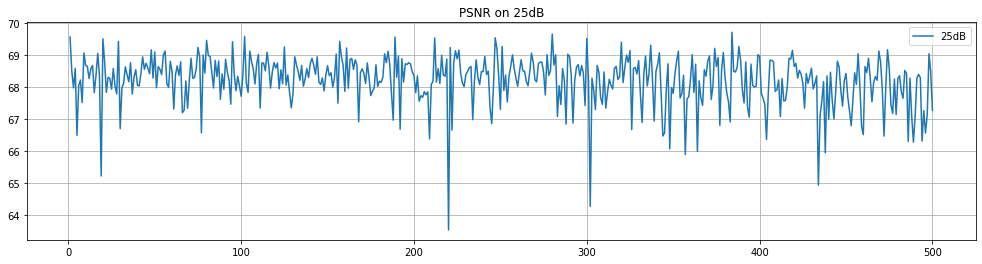

In [44]:
# Displaying psnr on 25dB data

xepochs = range(1,len(predicted_25dB) + 1)

plt.figure(figsize=(17,4))
plt.plot(xepochs, psnr_25dB, label = '25dB')
plt.title('PSNR on 25dB')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# PSNR on 30dB
n=1
for i in range(len(predicted_30dB)):
    n = n+1
    psnr = PSNR(noisy_30dB[i], predicted_30dB[i])
    psnr_30dB.append(psnr)

print(f'{n} PSNR for (noisy_30dB, predicted_30dB) calculated.')
print(f'avg PSNR for 30dB :{PSNR(noisy_30dB, predicted_30dB)}')

501 PSNR for (noisy_30dB, predicted_30dB) calculated.
avg PSNR for 30dB :68.5359568422941


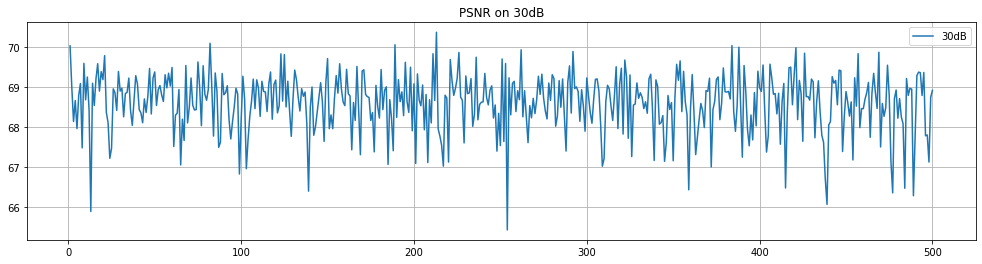

In [46]:
# Displaying psnr on 30dB data

xepochs = range(1,len(predicted_30dB) + 1)

plt.figure(figsize=(17,4))
plt.plot(xepochs, psnr_30dB, label = '30dB')
plt.title('PSNR on 30dB')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# PSNR on 100dB
n=1
for i in range(len(predicted_100dB)):
    n = n+1
    psnr = PSNR(noisy_100dB[i], predicted_100dB[i])
    psnr_100dB.append(psnr)

print(f'{n} PSNR for (noisy_100dB, predicted_100dB) calculated.')
print(f'avg PSNR for 100dB :{PSNR(noisy_100dB, predicted_100dB)}')

501 PSNR for (noisy_100dB, predicted_100dB) calculated.
avg PSNR for 100dB :61.214788870081605


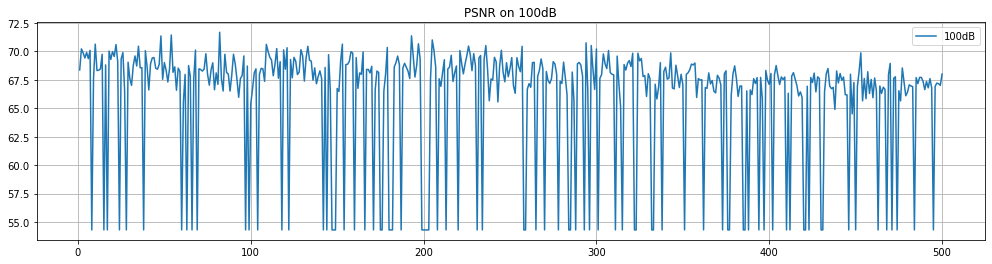

In [48]:
# Displaying psnr on 100dB data

xepochs = range(1,len(predicted_100dB) + 1)

plt.figure(figsize=(17,4))
plt.plot(xepochs, psnr_100dB, label = '100dB')
plt.title('PSNR on 100dB')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
# PSNR on clean data
n=1
for i in range(len(predicted_clean)):
    n = n+1
    psnr = PSNR(clean_data[i], predicted_clean[i])
    psnr_clean.append(psnr)

print(f'{n} PSNR for (clean_data, predicted_clean) calculated.')
print(f'avg PSNR for clean_data :{PSNR(clean_data, predicted_clean)}')

501 PSNR for (clean_data, predicted_clean) calculated.
avg PSNR for clean_data :69.60341504435632


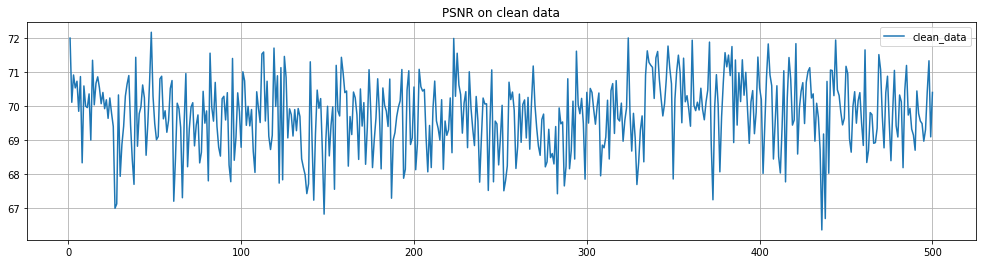

In [50]:
# Displaying psnr on clean data

xepochs = range(1,len(predicted_clean) + 1)

plt.figure(figsize=(17,4))
plt.plot(xepochs, psnr_clean, label = 'clean_data')
plt.title('PSNR on clean data')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
# all dBs mixed equally, data neven seen before

noisy_mix_path = 'D:\\intern\\classified_data\\noisy_data\\noisy_mix'
noisy_mix_files = os.listdir(noisy_mix_path)

noisy_mix = np.zeros((len(noisy_mix_files), height, width, channel), dtype=np.float32)

In [53]:
n=0
for i in tqdm(noisy_mix_files):
    img = cv2.imread(noisy_mix_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_mix[n] = img
    n = n+1
    
print(noisy_mix.shape)

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1240.14it/s]

(500, 64, 256, 3)


In [54]:
predicted_mix = model.predict(noisy_mix)

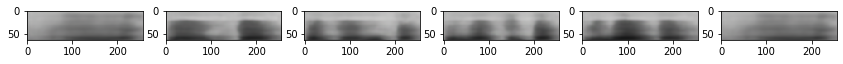

In [55]:
# Displaying predicted noisy mix images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    plt.imshow(predicted_mix[i])
plt.show()

In [57]:
psnr_mix = []

In [58]:
# PSNR on noisy mix data
n=1
for i in range(len(predicted_mix)):
    n = n+1
    psnr = PSNR(noisy_mix[i], predicted_mix[i])
    psnr_mix.append(psnr)

print(f'{n} PSNR for (noisy_mix, predicted_mix) calculated.')
print(f'avg PSNR for noisy :{PSNR(noisy_mix, predicted_15dB)}')

501 PSNR for (noisy_mix, predicted_mix) calculated.
avg PSNR for noisy :63.7707911324287


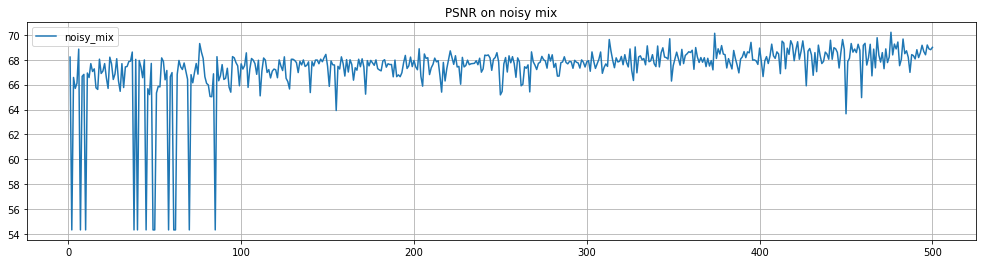

In [59]:
# Displaying psnr on noisy mix

xepochs = range(1,len(predicted_mix) + 1)

plt.figure(figsize=(17,4))
plt.plot(xepochs, psnr_mix, label = 'noisy_mix')
plt.title('PSNR on noisy mix')
plt.legend()
plt.grid(True)
plt.show()